In [1]:
import pandas as pd
import numpy as np

There are four datasets to be loaded. The rallies, events and serves come from Kaggle and are from the Tennis ATP Tour Australian Open Final 2019 between Nadal and Djokovic. The Points is a combination of a point by point dataset from Kaggle and from the JeffSackmann database, with this specific match (2019-ausopen-1701) selected as the point-by-point dataset. 

In [14]:
rallies = pd.read_csv('rallies.csv', index_col=0)
events = pd.read_csv('events.csv', index_col=0)
points = pd.read_csv('points2.csv', sep=';',index_col=0)
serves = pd.read_csv('serves.csv', index_col=0)

I add a column called 'rally_won1' which indicates whether that hit markes the last of the point. That can be the last shot of the rally, but excludes a wrong first serve (which counts as a rally, but doesn't finish the point).

In [15]:
events['rally_won1'] = ((events.rallyid != events.rallyid.shift(-1)) & (events.serve.shift(-1) == "first"))

The way I did it means that I manually have to include a win for the last hit of the match.

In [16]:
events.loc[864,'rally_won1'] = True

Show all columns

In [32]:
rallies.dtypes

rallyid        int64
server        object
returner      object
winner        object
reason        object
serve         object
strokes        int64
totaltime    float64
x            float64
y            float64
dtype: object

In [33]:
pd.options.display.max_columns = None


Now, I merge the rallies and the events datasets.

In [83]:
merged1 = pd.merge(rallies, events, how="inner", on=["rallyid"])
merged1.tail()

,rallyid,server,returner,winner,reason,serve_x,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,serve_y,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1
860,206,Nadal,Djokovic,Djokovic,out,second,5,4.6,0.59,23.86,256777,1,Nadal,Djokovic,True,second,serve,forehand,3.78,-0.65,8.08,23.75,7436.00,False
861,206,Nadal,Djokovic,Djokovic,out,second,5,4.6,0.59,23.86,256797,2,Djokovic,Nadal,False,first,return,backhand,7.75,23.96,4.36,0.50,7436.80,False
862,206,Nadal,Djokovic,Djokovic,out,second,5,4.6,0.59,23.86,256829,3,Nadal,Djokovic,False,second,topspin,forehand,5.21,-1.27,5.04,24.29,7438.08,False
863,206,Nadal,Djokovic,Djokovic,out,second,5,4.6,0.59,23.86,256857,4,Djokovic,Nadal,False,second,topspin,forehand,2.23,25.19,6.04,-3.12,7439.20,False
864,206,Nadal,Djokovic,Djokovic,out,second,5,4.6,0.59,23.86,256892,5,Nadal,Djokovic,False,second,topspin,backhand,7.52,-1.69,3.26,26.24,7440.60,True


In [73]:
len(merged)

793

In [140]:
merged3 = merged3.drop(['serve_x', 'serve_y'], axis=1)

Lets split the column 'score', so we can later grab the points with a specific score.

In [141]:
merged3[['setscore', 'gamescore']] = merged3['score'].str.split(',', n=1, expand=True)

In [144]:
merged3.tail()

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
860,206,Nadal,Djokovic,Djokovic,out,5,4.6,0.59,23.86,256777,1,Nadal,Djokovic,True,serve,forehand,3.78,-0.65,8.08,23.75,7436.00,False,2019-ausopen-1701,second,"6:3 6:2 6:3, 0:0",3.0,26.0,142.0,1.0,2.0,157.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,6:3 6:2 6:3,0:0
861,206,Nadal,Djokovic,Djokovic,out,5,4.6,0.59,23.86,256797,2,Djokovic,Nadal,False,return,backhand,7.75,23.96,4.36,0.50,7436.80,False,2019-ausopen-1701,second,"6:3 6:2 6:3, 0:0",3.0,26.0,142.0,1.0,2.0,157.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,6:3 6:2 6:3,0:0
862,206,Nadal,Djokovic,Djokovic,out,5,4.6,0.59,23.86,256829,3,Nadal,Djokovic,False,topspin,forehand,5.21,-1.27,5.04,24.29,7438.08,False,2019-ausopen-1701,second,"6:3 6:2 6:3, 0:0",3.0,26.0,142.0,1.0,2.0,157.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,6:3 6:2 6:3,0:0
863,206,Nadal,Djokovic,Djokovic,out,5,4.6,0.59,23.86,256857,4,Djokovic,Nadal,False,topspin,forehand,2.23,25.19,6.04,-3.12,7439.20,False,2019-ausopen-1701,second,"6:3 6:2 6:3, 0:0",3.0,26.0,142.0,1.0,2.0,157.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,6:3 6:2 6:3,0:0
864,206,Nadal,Djokovic,Djokovic,out,5,4.6,0.59,23.86,256892,5,Nadal,Djokovic,False,topspin,backhand,7.52,-1.69,3.26,26.24,7440.60,True,2019-ausopen-1701,second,"6:3 6:2 6:3, 0:0",3.0,26.0,142.0,1.0,2.0,157.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,6:3 6:2 6:3,0:0


In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

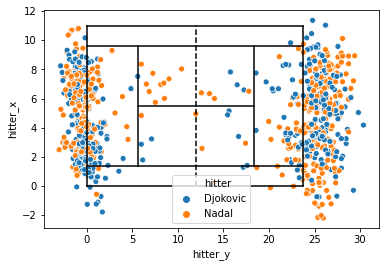

In [146]:
sns.scatterplot(y="hitter_x", x="hitter_y", hue="hitter", data=events)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

# Djokovic converting 30-0 into 40-0

Let's look at the points where Djokovic was leading 30-0 and managed to reach 40-0

In [147]:
djok_40_0 = merged3.loc[(merged3['P1Score'] == "40") & (merged3['P2Score'] == "0")]
djok_40_0

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
9,5,Djokovic,Nadal,Djokovic,ace,2,0.40,1.62,17.18,72790,1,Djokovic,Nadal,True,serve,forehand,6.17,-0.22,0.54,27.32,76.52,False,2019-ausopen-1701,second,"0:0, 40:0",1.0,1.0,3.0,1.0,1.0,173.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0:0,40:0
10,5,Djokovic,Nadal,Djokovic,ace,2,0.40,1.62,17.18,72800,2,Djokovic,Nadal,True,serve,forehand,6.43,-0.10,0.93,27.08,76.92,True,2019-ausopen-1701,second,"0:0, 40:0",1.0,1.0,3.0,1.0,1.0,173.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0:0,40:0
70,18,Djokovic,Nadal,Djokovic,out,6,6.40,8.55,22.48,83935,1,Djokovic,Nadal,True,serve,forehand,2.77,24.11,9.13,-2.98,522.32,False,2019-ausopen-1701,first,"2:0, 40:0",1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
71,18,Djokovic,Nadal,Djokovic,out,6,6.40,8.55,22.48,83955,2,Nadal,__undefined__,False,topspin,forehand,7.02,-1.47,3.19,23.33,523.12,False,2019-ausopen-1701,first,"2:0, 40:0",1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
72,18,Djokovic,Nadal,Djokovic,out,6,6.40,8.55,22.48,83995,3,Djokovic,Nadal,False,topspin,forehand,1.43,23.33,5.78,-3.31,524.72,False,2019-ausopen-1701,first,"2:0, 40:0",1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
73,18,Djokovic,Nadal,Djokovic,out,6,6.40,8.55,22.48,84025,4,Nadal,Djokovic,False,slice,backhand,9.20,-2.19,2.27,24.33,525.92,False,2019-ausopen-1701,first,"2:0, 40:0",1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
74,18,Djokovic,Nadal,Djokovic,out,6,6.40,8.55,22.48,84075,5,Djokovic,Nadal,False,topspin,backhand,4.71,21.65,4.76,-0.97,527.92,False,2019-ausopen-1701,first,"2:0, 40:0",1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
75,18,Djokovic,Nadal,Djokovic,out,6,6.40,8.55,22.48,84095,6,Nadal,__undefined__,False,slice,backhand,7.15,-0.22,4.24,21.96,528.72,True,2019-ausopen-1701,first,"2:0, 40:0",1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
124,33,Djokovic,Nadal,Djokovic,ace,1,0.00,4.23,18.13,96780,1,Djokovic,Nadal,True,serve,forehand,5.88,0.09,-0.48,28.47,1036.12,True,2019-ausopen-1701,first,"3:1, 40:0",1.0,5.0,24.0,1.0,1.0,194.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3:1,40:0
184,48,Djokovic,Nadal,Djokovic,winner,4,3.44,1.00,-3.57,109895,1,Djokovic,Nadal,True,serve,forehand,2.55,24.33,8.81,-1.71,1560.72,False,2019-ausopen-1701,second,"4:2, 40:0",1.0,7.0,34.0,1.0,1.0,177.0,40,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4:2,40:0


We can see that there have been 7 of such points in the match, and that they have all been won by djokovic

Lets remove some values

In [148]:
djok_40_0.loc[djok_40_0.rally_won1 == False, 'reason'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'winner'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'strokes'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'totaltime'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'x'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'y'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'serve'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'score'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'y'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'y'] = "-"
djok_40_0.loc[djok_40_0.rally_won1 == False, 'y'] = "-"

/Users/Bart/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [149]:
djok_40_0

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
9,5,Djokovic,Nadal,-,-,-,-,-,-,72790,1,Djokovic,Nadal,True,serve,forehand,6.17,-0.22,0.54,27.32,76.52,False,2019-ausopen-1701,-,-,1.0,1.0,3.0,1.0,1.0,173.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0:0,40:0
10,5,Djokovic,Nadal,Djokovic,ace,2,0.4,1.62,17.18,72800,2,Djokovic,Nadal,True,serve,forehand,6.43,-0.10,0.93,27.08,76.92,True,2019-ausopen-1701,second,"0:0, 40:0",1.0,1.0,3.0,1.0,1.0,173.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0:0,40:0
70,18,Djokovic,Nadal,-,-,-,-,-,-,83935,1,Djokovic,Nadal,True,serve,forehand,2.77,24.11,9.13,-2.98,522.32,False,2019-ausopen-1701,-,-,1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
71,18,Djokovic,Nadal,-,-,-,-,-,-,83955,2,Nadal,__undefined__,False,topspin,forehand,7.02,-1.47,3.19,23.33,523.12,False,2019-ausopen-1701,-,-,1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
72,18,Djokovic,Nadal,-,-,-,-,-,-,83995,3,Djokovic,Nadal,False,topspin,forehand,1.43,23.33,5.78,-3.31,524.72,False,2019-ausopen-1701,-,-,1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
73,18,Djokovic,Nadal,-,-,-,-,-,-,84025,4,Nadal,Djokovic,False,slice,backhand,9.20,-2.19,2.27,24.33,525.92,False,2019-ausopen-1701,-,-,1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
74,18,Djokovic,Nadal,-,-,-,-,-,-,84075,5,Djokovic,Nadal,False,topspin,backhand,4.71,21.65,4.76,-0.97,527.92,False,2019-ausopen-1701,-,-,1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
75,18,Djokovic,Nadal,Djokovic,out,6,6.4,8.55,22.48,84095,6,Nadal,__undefined__,False,slice,backhand,7.15,-0.22,4.24,21.96,528.72,True,2019-ausopen-1701,first,"2:0, 40:0",1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
124,33,Djokovic,Nadal,Djokovic,ace,1,0,4.23,18.13,96780,1,Djokovic,Nadal,True,serve,forehand,5.88,0.09,-0.48,28.47,1036.12,True,2019-ausopen-1701,first,"3:1, 40:0",1.0,5.0,24.0,1.0,1.0,194.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3:1,40:0
184,48,Djokovic,Nadal,-,-,-,-,-,-,109895,1,Djokovic,Nadal,True,serve,forehand,2.55,24.33,8.81,-1.71,1560.72,False,2019-ausopen-1701,-,-,1.0,7.0,34.0,1.0,1.0,177.0,40,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4:2,40:0


In [150]:
df3=djok_40_0.groupby(['winner','reason']).count().iloc[:,:1]
df3.columns=[['Points Won']]
df3

Points Won
winner   reason           
-        -              10
Djokovic ace             4
         out             2
         winner          1

So out of the 7 times Djokovic was leading 40 - 0, 4 times he won the point by an ace. He even hit an ace on his second serve! This is aggressive play!

In [151]:
djok_40_0.Speed_KMH.unique()

array([173., 197., 194., 177., 193., 192., 158.])

4 serves > 190 kmph!

In [152]:
djok_40_0.Speed_KMH.unique().mean()

183.42857142857142

And a mean serve speed of 183.4 kmph

In [153]:
# new df with only the strokes of Djokovic:
djok_40_0_1 = merged3.loc[(merged3['P1Score'] == "40") & (merged3['P2Score'] == "0")]
djok_40_0_1
df4 = djok_40_0_1[djok_40_0_1.hitter == 'Djokovic']

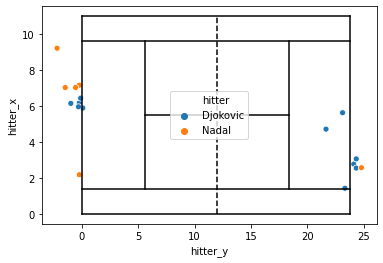

In [159]:
sns.scatterplot(y="hitter_x", x="hitter_y", hue="hitter", data=djok_40_0_1)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

Here we can see the positions at which both players hit their strokes. Clearly Djokovic hits closer to the net than Nadal. The sooner you hit the ball, the more aggressive you play. 

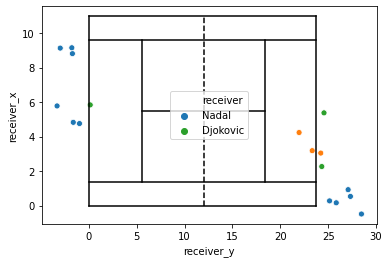

In [161]:
sns.scatterplot(y="receiver_x", x="receiver_y", hue="receiver", data=djok_40_0_1)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

Here we can see the positions at which both players received the ball during points when Djokovic was leading 40-0. Again, it is clear that Nadal is further behind the baseline, so he is in defence. 

We can also have a look at where the balls arrived in the winner points

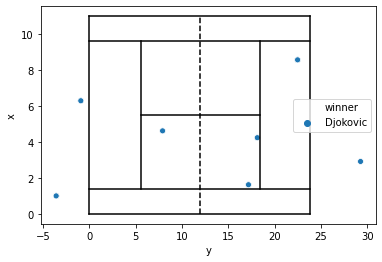

In [186]:
sns.scatterplot(y="x", x="y", hue="winner", data=djok_40_0_1)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

One x/y position seems to be off, because we can see 3 balls in the serve areas, where there should be 4, as there were 4 aces hit by Djokovic. Furthermore, there are 3 balls out, while there should have been 2. 



In [165]:
# a df with only the strokes that concluded the points:

df_trimmed = djok_40_0.loc[djok_40_0['winner'] != "-"]
df_trimmed.head()

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
10,5,Djokovic,Nadal,Djokovic,ace,2,0.4,1.62,17.18,72800,2,Djokovic,Nadal,True,serve,forehand,6.43,-0.10,0.93,27.08,76.92,True,2019-ausopen-1701,second,"0:0, 40:0",1.0,1.0,3.0,1.0,1.0,173.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0:0,40:0
75,18,Djokovic,Nadal,Djokovic,out,6,6.4,8.55,22.48,84095,6,Nadal,__undefined__,False,slice,backhand,7.15,-0.22,4.24,21.96,528.72,True,2019-ausopen-1701,first,"2:0, 40:0",1.0,3.0,12.0,1.0,1.0,197.0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2:0,40:0
124,33,Djokovic,Nadal,Djokovic,ace,1,0,4.23,18.13,96780,1,Djokovic,Nadal,True,serve,forehand,5.88,0.09,-0.48,28.47,1036.12,True,2019-ausopen-1701,first,"3:1, 40:0",1.0,5.0,24.0,1.0,1.0,194.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3:1,40:0
187,48,Djokovic,Nadal,Djokovic,winner,4,3.44,1,-3.57,109981,4,Nadal,Djokovic,False,topspin,forehand,2.18,-0.22,5.38,24.56,1564.16,True,2019-ausopen-1701,second,"4:2, 40:0",1.0,7.0,34.0,1.0,1.0,177.0,40,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4:2,40:0
312,78,Djokovic,Nadal,Djokovic,ace,1,0,2.91,29.27,138741,1,Djokovic,Nadal,True,serve,forehand,6.14,-0.97,0.17,25.84,2714.56,True,2019-ausopen-1701,first,"6:3 0:1, 40:0",2.0,11.0,53.0,1.0,1.0,193.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6:3 0:1,40:0


In [173]:
df_trimmed['strokes'] = pd.to_numeric(df_trimmed['strokes'])

<ipython-input-173-84ebc13410c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['strokes'] = pd.to_numeric(df_trimmed['strokes'])


In [174]:
df_trimmed.strokes.dtype

dtype('int64')

In [176]:
df_trimmed.strokes.mean()

2.4285714285714284

The mean number of strokes during the 40-0 rallies was 2.4

In [177]:
points.strokes.mean()

5.485915492957746

While the mean number of strokes during the rest of the rallies was 5.5

In [178]:
df5=djok_40_0.groupby(['hitter', 'stroke']).count().iloc[:,:1]
df5.columns=['count']
df5

count
hitter   stroke         
Djokovic backhand      2
         forehand      9
Nadal    backhand      2
         forehand      4

We see that both players  hit most points with their forehand, but the difference is bigger for Djokovic

In [180]:
percents_df = df5.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percents_df

count
hitter   stroke             
Djokovic backhand  18.181818
         forehand  81.818182
Nadal    backhand  33.333333
         forehand  66.666667

Here, this difference is expressed in a percentage

In [182]:
df6=events.groupby(['hitter', 'stroke']).count().iloc[:,:1]
df6.columns=['count']
percents_df1 = df6.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percents_df1


count
hitter   stroke                  
Djokovic __undefined__   0.234742
         backhand       37.558685
         forehand       62.206573
Nadal    backhand       34.168565
         forehand       65.831435

If we compare that to the rest of the match, we see that for Nadal, the ratio of forehands vs backhands is 
similar to the 40-0 games. However, the difference in the ratio of forehands vs backhands for Djokovic is striking.
He hit many more forehands during the 40-0 score rallies!

We can do something similar for the type of stroke

In [183]:
df7=djok_40_0.groupby(['hitter', 'type']).count().iloc[:,:1]
df7.columns=['count']
df7

count
hitter   type          
Djokovic serve        8
         topspin      3
Nadal    return       1
         slice        2
         topspin      3

We can see that Nadal hit two slice strokes, which are typically played to slow down the game. A defensive act.
Let's look at the percentages:

In [185]:
percents_df9 = df7.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percents_df9

count
hitter   type              
Djokovic serve    72.727273
         topspin  27.272727
Nadal    return   16.666667
         slice    33.333333
         topspin  50.000000

We can't draw any conclusions from this, because there are too few strokes to be examined. We can still look at how it was divided over the whole match:

In [184]:
df8 = events.groupby(['hitter', 'type']).count().iloc[:,:1]
df8.columns=['count']
percents_df2 = df8.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percents_df2


count
hitter   type              
Djokovic return   11.502347
         serve    22.535211
         slice     3.286385
         smash     0.234742
         stop      1.408451
         topspin  59.859155
         volley    1.173709
Nadal    lob       0.227790
         return   10.022779
         serve    24.829157
         slice     9.339408
         smash     0.227790
         stop      0.683371
         topspin  53.075171
         volley    1.594533

# Djokovic leading 40-0

Now let's see how Djokovic played on the points where he was leading 40-0

In [189]:
merged3.head(20)

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
0,1,Djokovic,Nadal,Djokovic,winner,3,0.92,1.92,21.96,70877,1,Djokovic,Nadal,True,serve,forehand,6.50,-0.24,1.03,27.44,0.00,False,2019-ausopen-1701,first,"0:0, 15:0",1.0,1.0,1.0,1.0,1.0,172.0,15,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0:0,15:0
1,1,Djokovic,Nadal,Djokovic,winner,3,0.92,1.92,21.96,70900,2,Nadal,Djokovic,False,slice,backhand,0.05,25.59,6.17,1.11,0.92,False,2019-ausopen-1701,first,"0:0, 15:0",1.0,1.0,1.0,1.0,1.0,172.0,15,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0:0,15:0
2,1,Djokovic,Nadal,Djokovic,winner,3,0.92,1.92,21.96,70950,3,Djokovic,Nadal,False,topspin,forehand,1.42,2.33,4.75,26.45,2.92,True,2019-ausopen-1701,first,"0:0, 15:0",1.0,1.0,1.0,1.0,1.0,172.0,15,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0:0,15:0
3,2,Djokovic,Nadal,__undefined__,second_serve,1,0.00,7.42,12.10,71488,1,Djokovic,Nadal,True,serve,forehand,4.48,-0.01,7.90,26.83,24.44,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Djokovic,Nadal,Djokovic,out,4,4.16,3.33,-0.39,71796,1,Djokovic,Nadal,True,serve,forehand,4.48,-0.37,7.88,26.47,36.76,False,2019-ausopen-1701,second,"0:0, 30:0",1.0,1.0,2.0,1.0,1.0,141.0,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0:0,30:0
5,3,Djokovic,Nadal,Djokovic,out,4,4.16,3.33,-0.39,71820,2,Nadal,Djokovic,False,slice,forehand,7.40,24.79,4.47,0.19,37.72,False,2019-ausopen-1701,second,"0:0, 30:0",1.0,1.0,2.0,1.0,1.0,141.0,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0:0,30:0
6,3,Djokovic,Nadal,Djokovic,out,4,4.16,3.33,-0.39,71860,3,Djokovic,Nadal,False,topspin,backhand,1.66,0.43,6.12,25.84,39.32,False,2019-ausopen-1701,second,"0:0, 30:0",1.0,1.0,2.0,1.0,1.0,141.0,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0:0,30:0
7,3,Djokovic,Nadal,Djokovic,out,4,4.16,3.33,-0.39,71900,4,Nadal,Djokovic,False,topspin,forehand,8.14,27.07,3.12,-0.94,40.92,True,2019-ausopen-1701,second,"0:0, 30:0",1.0,1.0,2.0,1.0,1.0,141.0,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0:0,30:0
8,4,Djokovic,Nadal,__undefined__,second_serve,1,0.00,4.64,17.69,72470,1,Djokovic,Nadal,True,serve,forehand,6.44,-0.27,0.96,26.71,63.72,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,Djokovic,Nadal,Djokovic,ace,2,0.40,1.62,17.18,72790,1,Djokovic,Nadal,True,serve,forehand,6.17,-0.22,0.54,27.32,76.52,False,2019-ausopen-1701,second,"0:0, 40:0",1.0,1.0,3.0,1.0,1.0,173.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0:0,40:0


In [219]:
# We can find it by looking at when the score after the point was 0 - 0, and before the point was 40-0. But also we should look at the points where the score is 40-15 after the point, and was 40-0 before the point!

new_df = merged3[ (((merged3['P1Score'] == '0') & (merged3['P2Score'] == '0')) & ((merged3['P1Score'].shift(1) == '40') & (merged3['P2Score'].shift(1) == '0'))) | (((merged3['P1Score'] == '40') & (merged3['P2Score'] == '15')) & ((merged3['P1Score'].shift(1) == '40') & (merged3['P2Score'].shift(1) == '0'))) ]

new_df


,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
11,6,Djokovic,Nadal,Djokovic,net,10,10.40,6.41,12.78,73280,1,Djokovic,Nadal,True,serve,forehand,4.45,-0.25,7.81,28.35,96.12,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
76,19,Djokovic,Nadal,Djokovic,ace,1,0.00,1.62,10.23,84605,1,Djokovic,Nadal,True,serve,forehand,5.32,27.19,1.71,-1.13,549.12,True,2019-ausopen-1701,first,"3:0, 0:0",1.0,3.0,13.0,1.0,1.0,193.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3:0,0:0
125,34,Djokovic,Nadal,Djokovic,winner,5,0.72,7.33,20.36,97264,1,Djokovic,Nadal,True,serve,forehand,4.02,-0.15,7.27,29.27,1055.48,False,2019-ausopen-1701,first,"4:1, 0:0",1.0,5.0,25.0,1.0,1.0,196.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4:1,0:0
188,49,Djokovic,Nadal,Djokovic,winner,3,1.96,8.16,4.30,110583,1,Djokovic,Nadal,True,serve,forehand,5.15,27.32,1.71,-1.25,1588.24,False,2019-ausopen-1701,first,"5:2, 0:0",1.0,7.0,35.0,1.0,1.0,188.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5:2,0:0
313,79,Djokovic,Nadal,Djokovic,net,4,3.56,4.26,11.57,139159,1,Djokovic,Nadal,True,serve,forehand,4.42,-0.91,8.20,26.94,2731.28,False,2019-ausopen-1701,first,"6:3 1:1, 0:0",2.0,11.0,54.0,1.0,1.0,180.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,6:3 1:1,0:0
542,128,Djokovic,Nadal,Djokovic,ace,1,0.00,1.40,8.41,184377,1,Djokovic,Nadal,True,serve,forehand,5.22,26.09,1.80,-0.97,4540.00,True,2019-ausopen-1701,first,"6:3 6:2 0:0, 0:0",2.0,17.0,89.0,1.0,1.0,192.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6:3 6:2 0:0,0:0


So we now have 6 ralliyid's of the points where Djokovic was leading 40-0. We can already see that he didn't lose any of these points. Now we should try to get the rally details of these points

In [247]:
rallyIDs = [6, 19, 34, 49, 79, 128]
  
# selecting rows based on above rally ids
rslt_df1 = merged3.loc[merged3['rallyid'].isin(rallyIDs)]
len(rslt_df)

24

We see there were 24 strokes during the 40-0 rallies. 

In [226]:
Djokovic_leading_40_0 = rslt_df

In [228]:
rslt_df.loc[rslt_df.rally_won1 == False, 'reason'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'winner'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'strokes'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'totaltime'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'x'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'y'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'serve'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'score'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'y'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'y'] = "-"
rslt_df.loc[rslt_df.rally_won1 == False, 'y'] = "-"

/Users/Bart/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [229]:
rslt_df

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
11,6,Djokovic,Nadal,-,-,-,-,-,-,73280,1,Djokovic,Nadal,True,serve,forehand,4.45,-0.25,7.81,28.35,96.12,False,2019-ausopen-1701,-,-,1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
12,6,Djokovic,Nadal,-,-,-,-,-,-,73300,2,Nadal,Djokovic,False,topspin,forehand,8.84,27.57,4.47,1.26,96.92,False,2019-ausopen-1701,-,-,1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
13,6,Djokovic,Nadal,-,-,-,-,-,-,73330,3,Djokovic,Nadal,False,topspin,backhand,1.57,1.37,8.12,26.94,98.12,False,2019-ausopen-1701,-,-,1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
14,6,Djokovic,Nadal,-,-,-,-,-,-,73360,4,Nadal,Djokovic,False,topspin,forehand,8.96,26.45,1.66,1.41,99.32,False,2019-ausopen-1701,-,-,1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
15,6,Djokovic,Nadal,-,-,-,-,-,-,73390,5,Djokovic,Nadal,False,topspin,forehand,3.11,-0.08,7.66,26.09,100.52,False,2019-ausopen-1701,-,-,1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
16,6,Djokovic,Nadal,-,-,-,-,-,-,73420,6,Nadal,Djokovic,False,topspin,forehand,7.35,25.14,3.55,-0.94,101.72,False,2019-ausopen-1701,-,-,1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
17,6,Djokovic,Nadal,-,-,-,-,-,-,73440,7,Djokovic,Nadal,False,topspin,backhand,3.25,-0.08,6.42,25.37,102.52,False,2019-ausopen-1701,-,-,1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
18,6,Djokovic,Nadal,-,-,-,-,-,-,73480,8,Nadal,Djokovic,False,topspin,forehand,8.38,28.74,3.86,-1.16,104.12,False,2019-ausopen-1701,-,-,1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
19,6,Djokovic,Nadal,-,-,-,-,-,-,73510,9,Djokovic,Nadal,False,topspin,backhand,1.11,-0.62,7.12,26.33,105.32,False,2019-ausopen-1701,-,-,1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
20,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73540,10,Nadal,Djokovic,False,slice,backhand,3.03,27.07,2.05,-0.71,106.52,True,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0


Now we removed some values, we can look at some statistics of the 40-0 points.


In [230]:
df10=rslt_df.groupby(['winner','reason']).count().iloc[:,:1]
df10.columns=[['Points Won']]
df10

Points Won
winner   reason           
-        -              18
Djokovic ace             2
         net             2
         winner          2

Of the 6 40-0 points, 2 were won by an ace, 2 were because Nadal hit the ball in the net, and two were won by a winner from Djokovic.

Lets look at the serve speeds

In [232]:
rslt_df.Speed_KMH.unique()

array([195., 193., 196., 188., 180., 192.])

In [233]:
rslt_df.Speed_KMH.unique().mean()

190.66666666666666

A mean serve speed of 190.7 kmph!

In [238]:
df11=points.groupby(['server']).mean()

df11

,rallyid,strokes,totaltime,x,y,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount
server,,,,,,,,,,,,,,,,,,,,,
Djokovic,106.637681,5.521739,4.376812,4.724348,12.815942,2.057971,14.507246,73.478261,1.188406,1.0,177.710145,0.115942,0.000000,0.217391,0.028986,0.0,0.000000,0.086957,0.202899,1.275362,4.869565
Nadal,100.890411,5.452055,4.048219,4.785068,14.336575,2.068493,13.780822,69.630137,1.547945,2.0,175.027397,0.000000,0.041096,0.150685,0.219178,0.0,0.027397,0.041096,0.164384,1.356164,5.027397


Turns out that Djokovic serves way harder in his 40-0 games than on average (177 kmph)! 

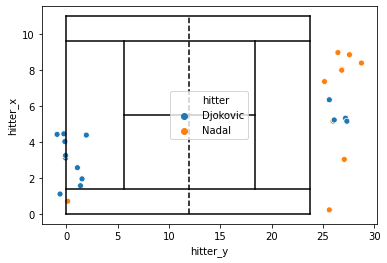

In [239]:
sns.scatterplot(y="hitter_x", x="hitter_y", hue="hitter", data=Djokovic_leading_40_0)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

Looking at the positions from where the players were hitting the balls from during the 40-0 rallies, we can see that Nadal is further behind the baseline than Djokovic, indicating that he is defending. 

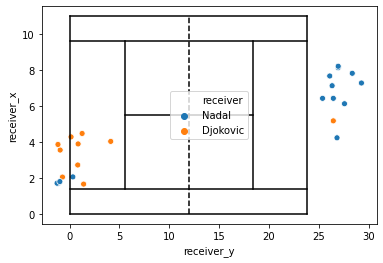

In [240]:
sns.scatterplot(y="receiver_x", x="receiver_y", hue="receiver", data=Djokovic_leading_40_0)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

Again from this image we can see that Djokovic is receiving the balls mostly in front of the baseline, while Nadal is receiving from behind the baseline. 

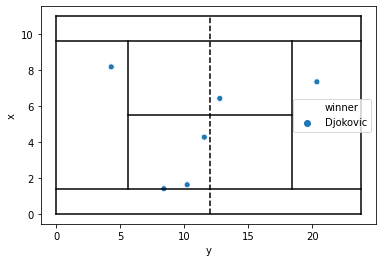

In [250]:
sns.scatterplot(y="x", x="y", hue="winner", data=rslt_df1)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

Here we can see where the balls landed at the winning strokes. Clearly there are the two balls at the net, hit by Nadal. Furthermore it is interesting to see how Djokovic hit two balls almost precisely on the line. Risk taker!

In [251]:
df_trimmed1 = rslt_df.loc[rslt_df['winner'] != "-"]
df_trimmed1.head()

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
20,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73540,10,Nadal,Djokovic,False,slice,backhand,3.03,27.07,2.05,-0.71,106.52,True,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
76,19,Djokovic,Nadal,Djokovic,ace,1,0,1.62,10.23,84605,1,Djokovic,Nadal,True,serve,forehand,5.32,27.19,1.71,-1.13,549.12,True,2019-ausopen-1701,first,"3:0, 0:0",1.0,3.0,13.0,1.0,1.0,193.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3:0,0:0
129,34,Djokovic,Nadal,Djokovic,winner,5,0.72,7.33,20.36,97379,5,Djokovic,Nadal,False,topspin,backhand,2.57,1.07,6.42,26.45,1060.08,True,2019-ausopen-1701,first,"4:1, 0:0",1.0,5.0,25.0,1.0,1.0,196.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4:1,0:0
190,49,Djokovic,Nadal,Djokovic,winner,3,1.96,8.16,4.3,110632,3,Djokovic,Nadal,False,topspin,backhand,6.34,25.61,2.06,0.33,1590.20,True,2019-ausopen-1701,first,"5:2, 0:0",1.0,7.0,35.0,1.0,1.0,188.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5:2,0:0
316,79,Djokovic,Nadal,Djokovic,net,4,3.56,4.26,11.57,139248,4,Nadal,Djokovic,False,topspin,backhand,0.23,25.61,4.03,4.13,2734.84,True,2019-ausopen-1701,first,"6:3 1:1, 0:0",2.0,11.0,54.0,1.0,1.0,180.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,6:3 1:1,0:0


In [253]:
df_trimmed1['strokes'] = pd.to_numeric(df_trimmed1['strokes'])

<ipython-input-253-96932e5addd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed1['strokes'] = pd.to_numeric(df_trimmed1['strokes'])


In [254]:
df_trimmed1['strokes'].dtype

dtype('int64')

In [256]:
df_trimmed1['strokes'].mean()

4.0

The mean amount of strokes in the rallies at 40-0 was 4.0. Again, that is lower than the average of all rallies, which was 5.5

In [257]:
df12=rslt_df.groupby(['hitter', 'stroke']).count().iloc[:,:1]
df12.columns=['count']
df12

count
hitter   stroke         
Djokovic backhand      6
         forehand      8
Nadal    backhand      3
         forehand      7

In [258]:
percents_df10 = df12.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percents_df10

count
hitter   stroke             
Djokovic backhand  42.857143
         forehand  57.142857
Nadal    backhand  30.000000
         forehand  70.000000

In [259]:
df13=events.groupby(['hitter', 'stroke']).count().iloc[:,:1]
df13.columns=['count']
percents_df10 = df6.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percents_df10

count
hitter   stroke                  
Djokovic __undefined__   0.234742
         backhand       37.558685
         forehand       62.206573
Nadal    backhand       34.168565
         forehand       65.831435

If we compare the percentages of strokes on fore and backhands, we can see that during the 40-0 games of Djokovic, both players managed to strike slightly more forehands than compared to the rest of the match.

Lets again look at the stroke types

In [260]:
df14=rslt_df.groupby(['hitter', 'type']).count().iloc[:,:1]
df14.columns=['count']
df14

count
hitter   type          
Djokovic serve        6
         topspin      8
Nadal    return       2
         slice        1
         topspin      7

Again we see that Nadal hit a slice stroke, indicating defence, whereas Djokovic only hit topspin. 

In [261]:
percents_df15 = df14.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percents_df15

count
hitter   type              
Djokovic serve    42.857143
         topspin  57.142857
Nadal    return   20.000000
         slice    10.000000
         topspin  70.000000

In percentages.

# Points where Djokovic was losing 40-0

In [262]:
# We can find it by looking at when the score after the point was 0 - 0, and before the point was 40-0. But also we should look at the points where the score is 40-15 after the point, and was 40-0 before the point!

new_df10 = merged3[ (((merged3['P1Score'] == '0') & (merged3['P2Score'] == '0')) & ((merged3['P1Score'].shift(1) == '0') & (merged3['P2Score'].shift(1) == '40'))) | (((merged3['P1Score'] == '15') & (merged3['P2Score'] == '40')) & ((merged3['P1Score'].shift(1) == '0') & (merged3['P2Score'].shift(1) == '40'))) ]

new_df10


,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
222,57,Nadal,Djokovic,Nadal,winner,3,2.36,8.34,1.15,118112,1,Nadal,Djokovic,True,serve,forehand,5.32,23.89,1.15,-0.97,1889.40,False,2019-ausopen-1701,first,"5:3, 0:0",1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
684,165,Nadal,Djokovic,Djokovic,out,3,1.56,6.09,25.26,220509,1,Nadal,Djokovic,True,serve,forehand,4.21,-0.22,8.38,25.49,5985.28,False,2019-ausopen-1701,first,"6:3 6:2 3:1, 15:40",3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40


In [263]:
rallyIDs1 = [57, 165]
  
# selecting rows based on above rally ids
rslt_df2 = merged3.loc[merged3['rallyid'].isin(rallyIDs1)]
rslt_df2

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
222,57,Nadal,Djokovic,Nadal,winner,3,2.36,8.34,1.15,118112,1,Nadal,Djokovic,True,serve,forehand,5.32,23.89,1.15,-0.97,1889.40,False,2019-ausopen-1701,first,"5:3, 0:0",1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
223,57,Nadal,Djokovic,Nadal,winner,3,2.36,8.34,1.15,118131,2,Djokovic,Nadal,False,return,forehand,2.93,0.19,4.62,22.37,1890.16,False,2019-ausopen-1701,first,"5:3, 0:0",1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
224,57,Nadal,Djokovic,Nadal,winner,3,2.36,8.34,1.15,118171,3,Nadal,Djokovic,False,topspin,forehand,2.72,24.33,5.24,-1.77,1891.76,True,2019-ausopen-1701,first,"5:3, 0:0",1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
684,165,Nadal,Djokovic,Djokovic,out,3,1.56,6.09,25.26,220509,1,Nadal,Djokovic,True,serve,forehand,4.21,-0.22,8.38,25.49,5985.28,False,2019-ausopen-1701,first,"6:3 6:2 3:1, 15:40",3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40
685,165,Nadal,Djokovic,Djokovic,out,3,1.56,6.09,25.26,220525,2,Djokovic,Nadal,False,return,forehand,6.99,25.02,4.80,1.48,5985.92,False,2019-ausopen-1701,first,"6:3 6:2 3:1, 15:40",3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40
686,165,Nadal,Djokovic,Djokovic,out,3,1.56,6.09,25.26,220548,3,Nadal,Djokovic,False,topspin,forehand,4.35,1.56,6.20,24.33,5986.84,True,2019-ausopen-1701,first,"6:3 6:2 3:1, 15:40",3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40


So we can see that there have been only 2 points at which Nadal was leading 40-0. Both with 3 strokes each. One point was won by Nadal, and the other by Djokovic. Lets see how both players played during these points.

In [264]:
nadal_40_0 = rslt_df2

In [266]:
rslt_df2.loc[rslt_df2.rally_won1 == False, 'reason'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'winner'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'strokes'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'totaltime'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'x'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'y'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'serve'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'score'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'y'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'y'] = "-"
rslt_df2.loc[rslt_df2.rally_won1 == False, 'y'] = "-"

/Users/Bart/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [267]:
rslt_df2

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
222,57,Nadal,Djokovic,-,-,-,-,-,-,118112,1,Nadal,Djokovic,True,serve,forehand,5.32,23.89,1.15,-0.97,1889.40,False,2019-ausopen-1701,-,-,1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
223,57,Nadal,Djokovic,-,-,-,-,-,-,118131,2,Djokovic,Nadal,False,return,forehand,2.93,0.19,4.62,22.37,1890.16,False,2019-ausopen-1701,-,-,1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
224,57,Nadal,Djokovic,Nadal,winner,3,2.36,8.34,1.15,118171,3,Nadal,Djokovic,False,topspin,forehand,2.72,24.33,5.24,-1.77,1891.76,True,2019-ausopen-1701,first,"5:3, 0:0",1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
684,165,Nadal,Djokovic,-,-,-,-,-,-,220509,1,Nadal,Djokovic,True,serve,forehand,4.21,-0.22,8.38,25.49,5985.28,False,2019-ausopen-1701,-,-,3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40
685,165,Nadal,Djokovic,-,-,-,-,-,-,220525,2,Djokovic,Nadal,False,return,forehand,6.99,25.02,4.80,1.48,5985.92,False,2019-ausopen-1701,-,-,3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40
686,165,Nadal,Djokovic,Djokovic,out,3,1.56,6.09,25.26,220548,3,Nadal,Djokovic,False,topspin,forehand,4.35,1.56,6.20,24.33,5986.84,True,2019-ausopen-1701,first,"6:3 6:2 3:1, 15:40",3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40


In [269]:
nadal_40_0 = merged3.loc[merged3['rallyid'].isin(rallyIDs1)]
nadal_40_0

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
222,57,Nadal,Djokovic,Nadal,winner,3,2.36,8.34,1.15,118112,1,Nadal,Djokovic,True,serve,forehand,5.32,23.89,1.15,-0.97,1889.40,False,2019-ausopen-1701,first,"5:3, 0:0",1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
223,57,Nadal,Djokovic,Nadal,winner,3,2.36,8.34,1.15,118131,2,Djokovic,Nadal,False,return,forehand,2.93,0.19,4.62,22.37,1890.16,False,2019-ausopen-1701,first,"5:3, 0:0",1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
224,57,Nadal,Djokovic,Nadal,winner,3,2.36,8.34,1.15,118171,3,Nadal,Djokovic,False,topspin,forehand,2.72,24.33,5.24,-1.77,1891.76,True,2019-ausopen-1701,first,"5:3, 0:0",1.0,8.0,39.0,2.0,2.0,196.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,5:3,0:0
684,165,Nadal,Djokovic,Djokovic,out,3,1.56,6.09,25.26,220509,1,Nadal,Djokovic,True,serve,forehand,4.21,-0.22,8.38,25.49,5985.28,False,2019-ausopen-1701,first,"6:3 6:2 3:1, 15:40",3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40
685,165,Nadal,Djokovic,Djokovic,out,3,1.56,6.09,25.26,220525,2,Djokovic,Nadal,False,return,forehand,6.99,25.02,4.80,1.48,5985.92,False,2019-ausopen-1701,first,"6:3 6:2 3:1, 15:40",3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40
686,165,Nadal,Djokovic,Djokovic,out,3,1.56,6.09,25.26,220548,3,Nadal,Djokovic,False,topspin,forehand,4.35,1.56,6.20,24.33,5986.84,True,2019-ausopen-1701,first,"6:3 6:2 3:1, 15:40",3.0,22.0,114.0,1.0,2.0,205.0,15,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6:3 6:2 3:1,15:40


So Nadal won his point by a winner, and lost his point by an out ball. 

In [270]:
rslt_df2.Speed_KMH.unique()

array([196., 205.])

In [271]:
rslt_df2.Speed_KMH.unique().mean()

200.5

In [324]:
servespeed = points.loc[points['serve']=='first']
servespeed.Speed_KMH.unique().mean()

180.54545454545453

Though his average serve speed in his 40-0 points has been higher than that of Djokovic, Nadal didn't manage to hit an ace. 

In [272]:
df11=points.groupby(['server']).mean()

df11

,rallyid,strokes,totaltime,x,y,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount
server,,,,,,,,,,,,,,,,,,,,,
Djokovic,106.637681,5.521739,4.376812,4.724348,12.815942,2.057971,14.507246,73.478261,1.188406,1.0,177.710145,0.115942,0.000000,0.217391,0.028986,0.0,0.000000,0.086957,0.202899,1.275362,4.869565
Nadal,100.890411,5.452055,4.048219,4.785068,14.336575,2.068493,13.780822,69.630137,1.547945,2.0,175.027397,0.000000,0.041096,0.150685,0.219178,0.0,0.027397,0.041096,0.164384,1.356164,5.027397


We can see that also Nadal has hit his serves harder than on average in the match.

Although there have been only 6 strokes, we can still have a look at the positions of the hitters , returners and the ball at the points where Nadal was leading 40-0.

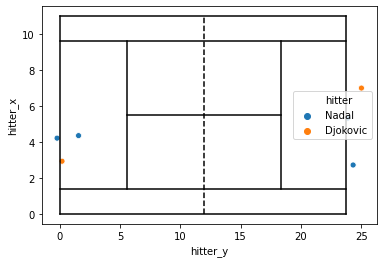

In [273]:
sns.scatterplot(y="hitter_x", x="hitter_y", hue="hitter", data=nadal_40_0)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

Here we can see that there have been similar positions from where the players hit the ball. 

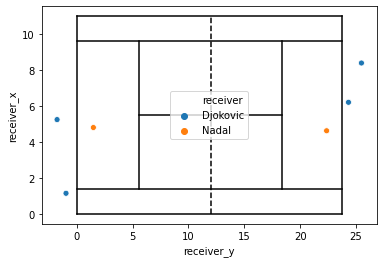

In [275]:
sns.scatterplot(y="receiver_x", x="receiver_y", hue="receiver", data=nadal_40_0)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

Here we can see that Nadal was clearly receiving the balls more in the field. This indicates an attacking style

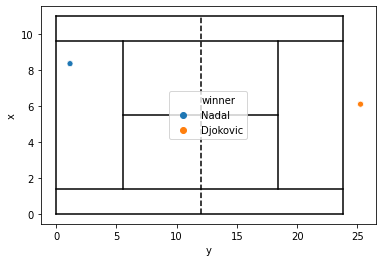

In [277]:
sns.scatterplot(y="x", x="y", hue="winner", data=nadal_40_0)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

We can see that Nadal hit one ball out, and one nicely in the corner.

As there were so little strokes to analyse, we won't look into the types of strokes.

# Momentum throughout the game

Now let's look at the moments in the match where either player had won several points in a row. In the above cases, the score-line would permit some risk-taking. But how does that work for the points which follow after several won points, but potentially are in a new game with equal score?

In [278]:
merged3.head(10)

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
0,1,Djokovic,Nadal,Djokovic,winner,3,0.92,1.92,21.96,70877,1,Djokovic,Nadal,True,serve,forehand,6.50,-0.24,1.03,27.44,0.00,False,2019-ausopen-1701,first,"0:0, 15:0",1.0,1.0,1.0,1.0,1.0,172.0,15,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0:0,15:0
1,1,Djokovic,Nadal,Djokovic,winner,3,0.92,1.92,21.96,70900,2,Nadal,Djokovic,False,slice,backhand,0.05,25.59,6.17,1.11,0.92,False,2019-ausopen-1701,first,"0:0, 15:0",1.0,1.0,1.0,1.0,1.0,172.0,15,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0:0,15:0
2,1,Djokovic,Nadal,Djokovic,winner,3,0.92,1.92,21.96,70950,3,Djokovic,Nadal,False,topspin,forehand,1.42,2.33,4.75,26.45,2.92,True,2019-ausopen-1701,first,"0:0, 15:0",1.0,1.0,1.0,1.0,1.0,172.0,15,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0:0,15:0
3,2,Djokovic,Nadal,__undefined__,second_serve,1,0.00,7.42,12.10,71488,1,Djokovic,Nadal,True,serve,forehand,4.48,-0.01,7.90,26.83,24.44,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Djokovic,Nadal,Djokovic,out,4,4.16,3.33,-0.39,71796,1,Djokovic,Nadal,True,serve,forehand,4.48,-0.37,7.88,26.47,36.76,False,2019-ausopen-1701,second,"0:0, 30:0",1.0,1.0,2.0,1.0,1.0,141.0,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0:0,30:0
5,3,Djokovic,Nadal,Djokovic,out,4,4.16,3.33,-0.39,71820,2,Nadal,Djokovic,False,slice,forehand,7.40,24.79,4.47,0.19,37.72,False,2019-ausopen-1701,second,"0:0, 30:0",1.0,1.0,2.0,1.0,1.0,141.0,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0:0,30:0
6,3,Djokovic,Nadal,Djokovic,out,4,4.16,3.33,-0.39,71860,3,Djokovic,Nadal,False,topspin,backhand,1.66,0.43,6.12,25.84,39.32,False,2019-ausopen-1701,second,"0:0, 30:0",1.0,1.0,2.0,1.0,1.0,141.0,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0:0,30:0
7,3,Djokovic,Nadal,Djokovic,out,4,4.16,3.33,-0.39,71900,4,Nadal,Djokovic,False,topspin,forehand,8.14,27.07,3.12,-0.94,40.92,True,2019-ausopen-1701,second,"0:0, 30:0",1.0,1.0,2.0,1.0,1.0,141.0,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0:0,30:0
8,4,Djokovic,Nadal,__undefined__,second_serve,1,0.00,4.64,17.69,72470,1,Djokovic,Nadal,True,serve,forehand,6.44,-0.27,0.96,26.71,63.72,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,Djokovic,Nadal,Djokovic,ace,2,0.40,1.62,17.18,72790,1,Djokovic,Nadal,True,serve,forehand,6.17,-0.22,0.54,27.32,76.52,False,2019-ausopen-1701,second,"0:0, 40:0",1.0,1.0,3.0,1.0,1.0,173.0,40,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0:0,40:0


In [279]:
points.head()

,rallyid,match_id,server,returner,winner,reason,serve,strokes,totaltime,x,y,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,2019-ausopen-1701,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0",1,1,1,1,1,172,15,0,0,0,1,0,0,0,0,0,1,3
2,3,2019-ausopen-1701,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39,"0:0, 30:0",1,1,2,1,1,141,30,0,0,0,0,0,0,0,0,1,2,3
3,5,2019-ausopen-1701,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18,"0:0, 40:0",1,1,3,1,1,173,40,0,1,0,0,0,0,0,0,0,1,0
4,6,2019-ausopen-1701,Djokovic,Nadal,Djokovic,net,first,10,10.40,6.41,12.78,"1:0, 0:0",1,1,4,1,1,195,0,0,0,0,0,0,0,0,0,0,1,9
5,8,2019-ausopen-1701,Nadal,Djokovic,Djokovic,out,second,7,7.20,0.50,18.67,"1:0, 15:0",1,2,5,1,2,159,15,0,0,0,0,0,0,0,0,1,2,6


In [292]:
# make a df with the points that follow after Djok won 3 points in a row:
df_3_in_row = points[(points['winner'].shift(1) == 'Djokovic') & (points['winner'].shift(2) == 'Djokovic') & (points['winner'].shift(3) == 'Djokovic')]
len(df_3_in_row)

36

Now that we have the points, we can get the rallies with all the strokes.

In [285]:
#make a list of the rallies
ralliesList = df_3_in_row['rallyid'].tolist()


In [289]:
#match the rallyid's and make merged df
df_3_in_row_rallies = merged3.loc[merged3['rallyid'].isin(ralliesList)]

df_3_in_row_rallies.head(10)

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
11,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73280,1,Djokovic,Nadal,True,serve,forehand,4.45,-0.25,7.81,28.35,96.12,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
12,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73300,2,Nadal,Djokovic,False,topspin,forehand,8.84,27.57,4.47,1.26,96.92,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
13,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73330,3,Djokovic,Nadal,False,topspin,backhand,1.57,1.37,8.12,26.94,98.12,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
14,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73360,4,Nadal,Djokovic,False,topspin,forehand,8.96,26.45,1.66,1.41,99.32,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
15,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73390,5,Djokovic,Nadal,False,topspin,forehand,3.11,-0.08,7.66,26.09,100.52,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
16,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73420,6,Nadal,Djokovic,False,topspin,forehand,7.35,25.14,3.55,-0.94,101.72,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
17,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73440,7,Djokovic,Nadal,False,topspin,backhand,3.25,-0.08,6.42,25.37,102.52,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
18,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73480,8,Nadal,Djokovic,False,topspin,forehand,8.38,28.74,3.86,-1.16,104.12,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
19,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73510,9,Djokovic,Nadal,False,topspin,backhand,1.11,-0.62,7.12,26.33,105.32,False,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0
20,6,Djokovic,Nadal,Djokovic,net,10,10.4,6.41,12.78,73540,10,Nadal,Djokovic,False,slice,backhand,3.03,27.07,2.05,-0.71,106.52,True,2019-ausopen-1701,first,"1:0, 0:0",1.0,1.0,4.0,1.0,1.0,195.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1:0,0:0


So we have 188 strokes from points that followed after Djokovic had won 3 points in a row.

In [294]:
df_3_in_row_events = events.loc[events['rallyid'].isin(ralliesList)]
df_3_in_row_events

,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1
11,6,73280,1,Djokovic,Nadal,True,first,serve,forehand,4.45,-0.25,7.81,28.35,96.12,False
12,6,73300,2,Nadal,Djokovic,False,first,topspin,forehand,8.84,27.57,4.47,1.26,96.92,False
13,6,73330,3,Djokovic,Nadal,False,first,topspin,backhand,1.57,1.37,8.12,26.94,98.12,False
14,6,73360,4,Nadal,Djokovic,False,first,topspin,forehand,8.96,26.45,1.66,1.41,99.32,False
15,6,73390,5,Djokovic,Nadal,False,first,topspin,forehand,3.11,-0.08,7.66,26.09,100.52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,204,255255,8,Djokovic,Nadal,False,first,topspin,backhand,6.31,26.24,5.20,-1.87,7375.12,False
855,204,255287,9,Nadal,Djokovic,False,first,topspin,forehand,2.94,-1.43,6.32,26.00,7376.40,False
856,204,255321,10,Djokovic,Nadal,False,first,topspin,forehand,2.35,27.44,4.65,-1.18,7377.76,False
857,204,255347,11,Nadal,Djokovic,False,first,topspin,backhand,7.01,-1.40,2.26,26.12,7378.80,False


In [293]:
df_3_in_row_points = points.loc[points['rallyid'].isin(ralliesList)]
df_3_in_row_points

,rallyid,match_id,server,returner,winner,reason,serve,strokes,totaltime,x,y,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,6,2019-ausopen-1701,Djokovic,Nadal,Djokovic,net,first,10,10.40,6.41,12.78,"1:0, 0:0",1,1,4,1,1,195,0,0,0,0,0,0,0,0,0,0,1,9
5,8,2019-ausopen-1701,Nadal,Djokovic,Djokovic,out,second,7,7.20,0.50,18.67,"1:0, 15:0",1,2,5,1,2,159,15,0,0,0,0,0,0,0,0,1,2,6
6,9,2019-ausopen-1701,Nadal,Djokovic,Djokovic,winner,first,12,0.92,3.65,9.50,"1:0, 30:0",1,2,6,1,2,198,30,0,0,0,1,0,0,0,0,0,1,12
7,11,2019-ausopen-1701,Nadal,Djokovic,Nadal,winner,first,4,1.08,7.34,18.76,"1:0, 30:15",1,2,7,2,2,187,30,15,0,0,0,1,0,0,0,0,1,3
11,17,2019-ausopen-1701,Djokovic,Nadal,Djokovic,out,first,4,4.00,5.45,30.23,"2:0, 30:0",1,3,11,1,1,161,30,0,0,0,0,0,0,0,0,1,2,3
12,18,2019-ausopen-1701,Djokovic,Nadal,Djokovic,out,first,6,6.40,8.55,22.48,"2:0, 40:0",1,3,12,1,1,197,40,0,0,0,0,0,0,0,0,0,1,5
13,19,2019-ausopen-1701,Djokovic,Nadal,Djokovic,ace,first,1,0.00,1.62,10.23,"3:0, 0:0",1,3,13,1,1,193,0,0,1,0,0,0,0,0,0,0,1,0
14,20,2019-ausopen-1701,Nadal,Djokovic,Djokovic,winner,first,12,12.92,0.53,21.45,"3:0, 15:0",1,4,14,1,2,194,15,0,0,0,1,0,0,0,0,0,1,12
15,22,2019-ausopen-1701,Nadal,Djokovic,Nadal,out,second,2,0.76,4.77,24.68,"3:0, 15:15",1,4,15,2,2,166,15,15,0,0,0,0,0,0,1,0,2,1


In [295]:
df_3_in_row_points.to_csv ('won_3_in_row_points.csv', index = False, header=True)

Nadal managed to 'break' the momentum of Djokovic 13 times, while 23 times, Djokovic managed to 'maintain' his momentum.

In [306]:
# Plotly and cufflinks for data analysis
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True) 

cf.set_config_file(theme='ggplot')
cf.go_offline()

In [307]:
df_3_in_row_points.groupby('reason')['winner'].value_counts().unstack().iplot(kind='bar')


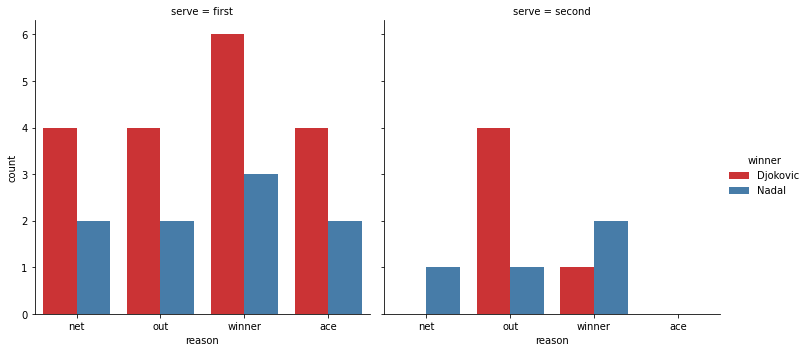

In [330]:
sns.catplot(x="reason", hue='winner', col='serve',data=df_3_in_row_points, kind='count' ,palette="Set1")

We can see here that Djokovic won more points than Nadal by winners. Also he won more points as a result of a ball that was hit out or in the net. And he won more points by hitting an ace.

In [308]:
df_3_in_row_points.groupby('strokes')['winner'].value_counts().unstack().iplot(kind='bar')


Interestingly, we can see that Nadal won most points with 2 strokes length, and Djokovic at most other point lengths. Although it is just a small amount of datapoints, we might be able to find something here.

In [311]:
df_2_strokes = df_3_in_row_points.loc[df_3_in_row_points['strokes'] == 2]
df_2_strokes

,rallyid,match_id,server,returner,winner,reason,serve,strokes,totaltime,x,y,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,22,2019-ausopen-1701,Nadal,Djokovic,Nadal,out,second,2,0.76,4.77,24.68,"3:0, 15:15",1,4,15,2,2,166,15,15,0,0,0,0,0,0,1,0,2,1
27,37,2019-ausopen-1701,Nadal,Djokovic,Nadal,net,first,2,0.84,7.47,17.52,"4:1, 15:15",1,6,27,2,2,165,15,15,0,0,0,1,0,0,0,0,1,1
55,80,2019-ausopen-1701,Nadal,__undefined__,Nadal,net,first,2,0.76,2.89,13.93,"6:3 1:1, 0:15",2,12,55,2,2,187,0,15,0,0,0,0,0,0,0,0,1,1
99,146,2019-ausopen-1701,Djokovic,Nadal,Djokovic,out,second,2,0.92,6.98,-2.10,"6:3 6:2 1:1, 0:0",3,19,99,1,1,144,0,0,0,0,0,0,0,0,0,1,2,1
100,147,2019-ausopen-1701,Nadal,Djokovic,Nadal,out,first,2,0.76,4.42,24.45,"6:3 6:2 1:1, 0:15",3,20,100,2,2,195,0,15,0,0,0,0,0,0,0,0,1,1


In [312]:
# get the rallies
ralliesList1 = [22, 37, 80, 146, 147]
df_2_strokes_rallies = merged3.loc[merged3['rallyid'].isin(ralliesList1)]
df_2_strokes_rallies

,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
90,22,Nadal,Djokovic,Nadal,out,2,0.76,4.77,24.68,88917,1,Nadal,Djokovic,True,serve,forehand,5.14,24.45,0.94,0.29,721.60,False,2019-ausopen-1701,second,"3:0, 15:15",1.0,4.0,15.0,2.0,2.0,166.0,15,15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3:0,15:15
91,22,Nadal,Djokovic,Nadal,out,2,0.76,4.77,24.68,88936,2,Djokovic,Nadal,False,topspin,forehand,0.97,0.61,4.58,22.37,722.36,True,2019-ausopen-1701,second,"3:0, 15:15",1.0,4.0,15.0,2.0,2.0,166.0,15,15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3:0,15:15
134,37,Nadal,Djokovic,Nadal,net,2,0.84,7.47,17.52,101276,1,Nadal,Djokovic,True,serve,forehand,3.91,-0.78,8.46,25.84,1215.96,False,2019-ausopen-1701,first,"4:1, 15:15",1.0,6.0,27.0,2.0,2.0,165.0,15,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4:1,15:15
135,37,Nadal,Djokovic,Nadal,net,2,0.84,7.47,17.52,101297,2,Djokovic,Nadal,False,return,backhand,11.36,24.79,4.71,1.29,1216.80,True,2019-ausopen-1701,first,"4:1, 15:15",1.0,6.0,27.0,2.0,2.0,165.0,15,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4:1,15:15
317,80,Nadal,__undefined__,Nadal,net,2,0.76,2.89,13.93,140263,1,Nadal,__undefined__,True,serve,forehand,3.74,23.01,8.01,-2.27,2775.44,False,2019-ausopen-1701,first,"6:3 1:1, 0:15",2.0,12.0,55.0,2.0,2.0,187.0,0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6:3 1:1,0:15
318,80,Nadal,__undefined__,Nadal,net,2,0.76,2.89,13.93,140282,2,Djokovic,Nadal,False,return,backhand,6.02,-1.16,3.61,21.55,2776.20,True,2019-ausopen-1701,first,"6:3 1:1, 0:15",2.0,12.0,55.0,2.0,2.0,187.0,0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6:3 1:1,0:15
602,146,Djokovic,Nadal,Djokovic,out,2,0.92,6.98,-2.10,203388,1,Djokovic,Nadal,True,serve,forehand,4.44,-0.29,7.88,24.22,5300.44,False,2019-ausopen-1701,second,"6:3 6:2 1:1, 0:0",3.0,19.0,99.0,1.0,1.0,144.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,6:3 6:2 1:1,0:0
603,146,Djokovic,Nadal,Djokovic,out,2,0.92,6.98,-2.10,203411,2,Nadal,Djokovic,False,return,forehand,9.17,23.77,4.36,-0.12,5301.36,True,2019-ausopen-1701,second,"6:3 6:2 1:1, 0:0",3.0,19.0,99.0,1.0,1.0,144.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,6:3 6:2 1:1,0:0
604,147,Nadal,Djokovic,Nadal,out,2,0.76,4.42,24.45,204489,1,Nadal,Djokovic,True,serve,forehand,4.07,23.77,8.39,-2.70,5344.48,False,2019-ausopen-1701,first,"6:3 6:2 1:1, 0:15",3.0,20.0,100.0,2.0,2.0,195.0,0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6:3 6:2 1:1,0:15
605,147,Nadal,Djokovic,Nadal,out,2,0.76,4.42,24.45,204508,2,Djokovic,Nadal,False,slice,backhand,5.00,-1.22,3.80,22.37,5345.24,True,2019-ausopen-1701,first,"6:3 6:2 1:1, 0:15",3.0,20.0,100.0,2.0,2.0,195.0,0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6:3 6:2 1:1,0:15


In [315]:
df_2_strokes.groupby("server")["Speed_KMH"].mean()

server
Djokovic    144.00
Nadal       178.25
Name: Speed_KMH, dtype: float64

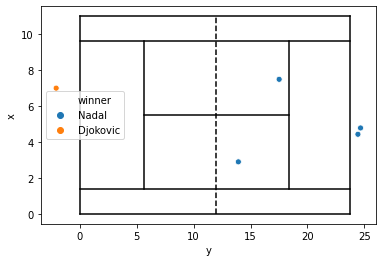

In [316]:
sns.scatterplot(y="x", x="y", hue="winner", data=df_2_strokes)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

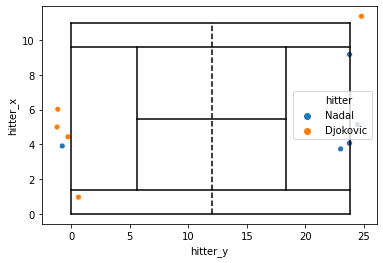

In [318]:
sns.scatterplot(y="hitter_x", x="hitter_y", hue="hitter", data=df_2_strokes_rallies)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

In [320]:
!jupyter nbconvert --to html Notebook3.ipynb

[NbConvertApp] Converting notebook Notebook3.ipynb to html
[NbConvertApp] Writing 884770 bytes to Notebook3.html


In [328]:
df_3_in_row_points_nadal_win = df_3_in_row_points.loc[df_3_in_row_points['winner'] == 'Nadal']
df_3_in_row_points_nadal_win.head(20)


,rallyid,match_id,server,returner,winner,reason,serve,strokes,totaltime,x,y,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,11,2019-ausopen-1701,Nadal,Djokovic,Nadal,winner,first,4,1.08,7.34,18.76,"1:0, 30:15",1,2,7,2,2,187,30,15,0,0,0,1,0,0,0,0,1,3
15,22,2019-ausopen-1701,Nadal,Djokovic,Nadal,out,second,2,0.76,4.77,24.68,"3:0, 15:15",1,4,15,2,2,166,15,15,0,0,0,0,0,0,1,0,2,1
27,37,2019-ausopen-1701,Nadal,Djokovic,Nadal,net,first,2,0.84,7.47,17.52,"4:1, 15:15",1,6,27,2,2,165,15,15,0,0,0,1,0,0,0,0,1,1
36,51,2019-ausopen-1701,Nadal,Djokovic,Nadal,winner,second,7,7.08,8.40,0.61,"5:2, 0:15",1,8,36,2,2,163,0,15,0,0,0,1,0,0,0,0,2,7
46,66,2019-ausopen-1701,Nadal,Djokovic,Nadal,winner,first,3,0.88,1.67,20.06,"6:3 0:0, 15:15",2,10,46,2,2,170,15,15,0,0,0,1,0,0,0,0,1,3
55,80,2019-ausopen-1701,Nadal,__undefined__,Nadal,net,first,2,0.76,2.89,13.93,"6:3 1:1, 0:15",2,12,55,2,2,187,0,15,0,0,0,0,0,0,0,0,1,1
68,98,2019-ausopen-1701,Nadal,Djokovic,Nadal,ace,first,1,0.00,-1.11,26.94,"6:3 2:2, 30:15",2,14,68,2,2,194,30,15,0,1,0,0,0,0,0,0,1,0
90,130,2019-ausopen-1701,Nadal,Djokovic,Nadal,winner,second,7,2.48,0.68,21.85,"6:3 6:2 0:0, 0:15",3,18,90,2,2,145,0,15,0,0,0,1,0,0,0,0,2,7
100,147,2019-ausopen-1701,Nadal,Djokovic,Nadal,out,first,2,0.76,4.42,24.45,"6:3 6:2 1:1, 0:15",3,20,100,2,2,195,0,15,0,0,0,0,0,0,0,0,1,1


In [341]:
df_3_in_row_points_nadal_win_rallies = df_3_in_row_rallies.loc[df_3_in_row_rallies['winner'] == 'Nadal']
df_3_in_row_points_nadal_win_rallies.head(50)


,rallyid,server,returner,winner,reason,strokes,totaltime,x,y,frameid,strokeid,hitter,receiver,isserve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,rally_won1,match_id,serve,score,SetNo,GameNo,PointNumber,PointWinner,PointServer,Speed_KMH,P1Score,P2Score,P1Ace,P2Ace,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,ServeNumber,RallyCount,setscore,gamescore
42,11,Nadal,Djokovic,Nadal,winner,4,1.08,7.34,18.76,78015,1,Djokovic,Nadal,False,return,forehand,-0.74,25.49,5.96,2.85,285.52,False,2019-ausopen-1701,first,"1:0, 30:15",1.0,2.0,7.0,2.0,2.0,187.0,30,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1:0,30:15
43,11,Nadal,Djokovic,Nadal,winner,4,1.08,7.34,18.76,78578,2,Nadal,Djokovic,True,serve,forehand,5.53,-0.43,1.41,25.65,308.04,False,2019-ausopen-1701,first,"1:0, 30:15",1.0,2.0,7.0,2.0,2.0,187.0,30,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1:0,30:15
44,11,Nadal,Djokovic,Nadal,winner,4,1.08,7.34,18.76,78605,3,Djokovic,Nadal,False,slice,backhand,4.00,25.84,6.59,1.04,309.12,False,2019-ausopen-1701,first,"1:0, 30:15",1.0,2.0,7.0,2.0,2.0,187.0,30,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1:0,30:15
45,11,Nadal,Djokovic,Nadal,winner,4,1.08,7.34,18.76,78635,4,Nadal,Djokovic,False,topspin,forehand,4.07,4.39,4.80,27.32,310.32,True,2019-ausopen-1701,first,"1:0, 30:15",1.0,2.0,7.0,2.0,2.0,187.0,30,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1:0,30:15
90,22,Nadal,Djokovic,Nadal,out,2,0.76,4.77,24.68,88917,1,Nadal,Djokovic,True,serve,forehand,5.14,24.45,0.94,0.29,721.60,False,2019-ausopen-1701,second,"3:0, 15:15",1.0,4.0,15.0,2.0,2.0,166.0,15,15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3:0,15:15
91,22,Nadal,Djokovic,Nadal,out,2,0.76,4.77,24.68,88936,2,Djokovic,Nadal,False,topspin,forehand,0.97,0.61,4.58,22.37,722.36,True,2019-ausopen-1701,second,"3:0, 15:15",1.0,4.0,15.0,2.0,2.0,166.0,15,15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3:0,15:15
134,37,Nadal,Djokovic,Nadal,net,2,0.84,7.47,17.52,101276,1,Nadal,Djokovic,True,serve,forehand,3.91,-0.78,8.46,25.84,1215.96,False,2019-ausopen-1701,first,"4:1, 15:15",1.0,6.0,27.0,2.0,2.0,165.0,15,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4:1,15:15
135,37,Nadal,Djokovic,Nadal,net,2,0.84,7.47,17.52,101297,2,Djokovic,Nadal,False,return,backhand,11.36,24.79,4.71,1.29,1216.80,True,2019-ausopen-1701,first,"4:1, 15:15",1.0,6.0,27.0,2.0,2.0,165.0,15,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4:1,15:15
192,51,Nadal,Djokovic,Nadal,winner,7,7.08,8.40,0.61,113973,1,Nadal,Djokovic,True,serve,forehand,4.01,24.00,8.33,-0.15,1723.84,False,2019-ausopen-1701,second,"5:2, 0:15",1.0,8.0,36.0,2.0,2.0,163.0,0,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,7.0,5:2,0:15
193,51,Nadal,Djokovic,Nadal,winner,7,7.08,8.40,0.61,113994,2,Djokovic,Nadal,False,return,forehand,7.30,0.15,3.65,22.48,1724.68,False,2019-ausopen-1701,second,"5:2, 0:15",1.0,8.0,36.0,2.0,2.0,163.0,0,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,7.0,5:2,0:15


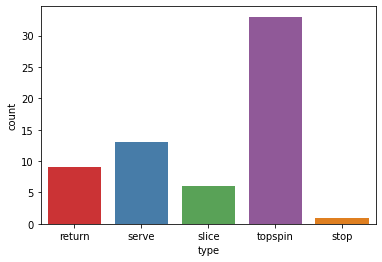

In [338]:
ax = sns.countplot(x="type",data=df_3_in_row_points_nadal_win_rallies, palette="Set1")

In [340]:
df_3_in_row_points_nadal_win_rallies.groupby('type')['hitter'].value_counts().unstack().iplot(kind='bar')


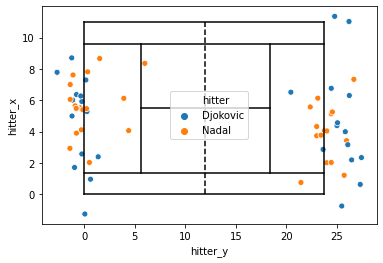

In [342]:
sns.scatterplot(y="hitter_x", x="hitter_y", hue="hitter", data=df_3_in_row_points_nadal_win_rallies)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

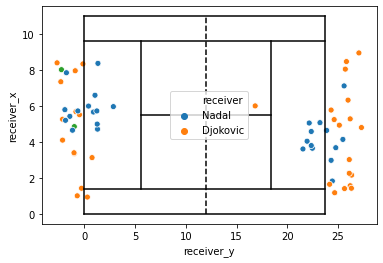

In [343]:
sns.scatterplot(y="receiver_x", x="receiver_y", hue="receiver", data=df_3_in_row_points_nadal_win_rallies)
plt.plot([0,0],[0,10.97], 'k')
plt.plot([23.77,0],[0,0], 'k')
plt.plot([23.77,23.77],[0,10.97], 'k')
plt.plot([23.77,0],[10.97,10.97], 'k')

plt.plot([11.985,11.985],[0,10.97], 'k',linestyle='dashed')

plt.plot([23.77,0],[1.37,1.37], 'k')
plt.plot([23.77,0],[9.6,9.6], 'k')

plt.plot([18.385,18.385],[1.37,9.6], 'k')
plt.plot([5.585,5.585],[1.37,9.6], 'k')

plt.plot([5.585,18.385],[5.485,5.485], 'k')

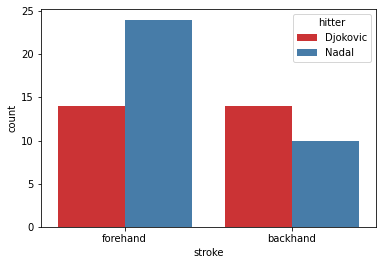

In [344]:
ax1 = sns.countplot(x="stroke",hue="hitter",data= df_3_in_row_points_nadal_win_rallies, palette="Set1")

In [345]:
!jupyter nbconvert --to html Notebook3.ipynb

[NbConvertApp] Converting notebook Notebook3.ipynb to html
[NbConvertApp] Writing 1039315 bytes to Notebook3.html
